# Prediction Results with Audio Annotations

**Last Modified**: Aug 20, 2025

In this notebook, we summarize and visualize the results for behavior classification with audio and video annotations. The training and testing data splits are created randomly for this experiment. We conduct hyperparameter tuning and look at the prediction results of the best performing model. We choose five categories of interest -feeding, moving, resting, running, and vigilant.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# System & OS

import sys
import json
sys.path.append('../')
sys.path.append('../../')

import numpy as np
import pandas as pd

# Torch
import torch

# Script imports
from src.utils.io import (get_results_path)

from src.utils.plots import(multi_label_predictions)

from config.settings import (RAW_BEHAVIORS,
                             )


from src.utils.Vectronics_preprocessing import (load_annotations,
                                                load_Vectronics_data_metadata)
# Plotting
import matplotlib.pyplot as plt

# Sklearn
from sklearn.preprocessing import LabelEncoder

device = torch.device(f"cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# Graphing Parameters
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 12
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30
mpl.rcParams["axes.labelsize"] = 30
mpl.rcParams['legend.fontsize'] = 30
mpl.rcParams['axes.titlesize'] = 35
mpl.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'

In [4]:
acc_data, acc_data_metadata = load_Vectronics_data_metadata()

# Group and sum durations in hours
duration_table = acc_data.groupby(['Source', 'behavior'])['duration'].sum().div(3600)

# Convert to a pivot table: behaviors as rows, sources as columns
duration_df = duration_table.unstack(fill_value=0)

# Add a row for total duration per source
duration_df.loc['Total'] = duration_df.sum()

print(duration_df)

behavior   Feeding     Moving   Running  Stationary
Source                                             
Audio     2.708468   9.080176  5.363462    0.000000
Video     1.318418   1.670032  0.093556   68.015672
Total     4.026886  10.750208  5.457018   68.015672


In [5]:
# load matched acceleration and label pairs data, metadata, and summary

all_annotations = load_annotations()

# Group and sum durations in hours
duration_table = np.round(all_annotations.groupby(['Source', 'Behavior'])['duration'].sum().div(3600), 4)

# Convert to a pivot table: behaviors as rows, sources as columns
duration_df = duration_table.unstack(fill_value=0)

# Add a row for total duration per source
duration_df.loc['Total'] = duration_df.sum()

print("DURATION SUMMARY FOR ANNOTATIONS")
print(duration_df)

DURATION SUMMARY FOR ANNOTATIONS
Behavior  Feeding   Moving  Running  Stationary
Source                                         
Audio      2.7131   9.1328   5.4644      0.0000
Video      1.4881   3.6972   0.1722     80.8881
Total      4.2012  12.8300   5.6366     80.8881


## 1. Prediction Results without Trotting Behavior

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(RAW_BEHAVIORS)
experiment_name = 'no_split'

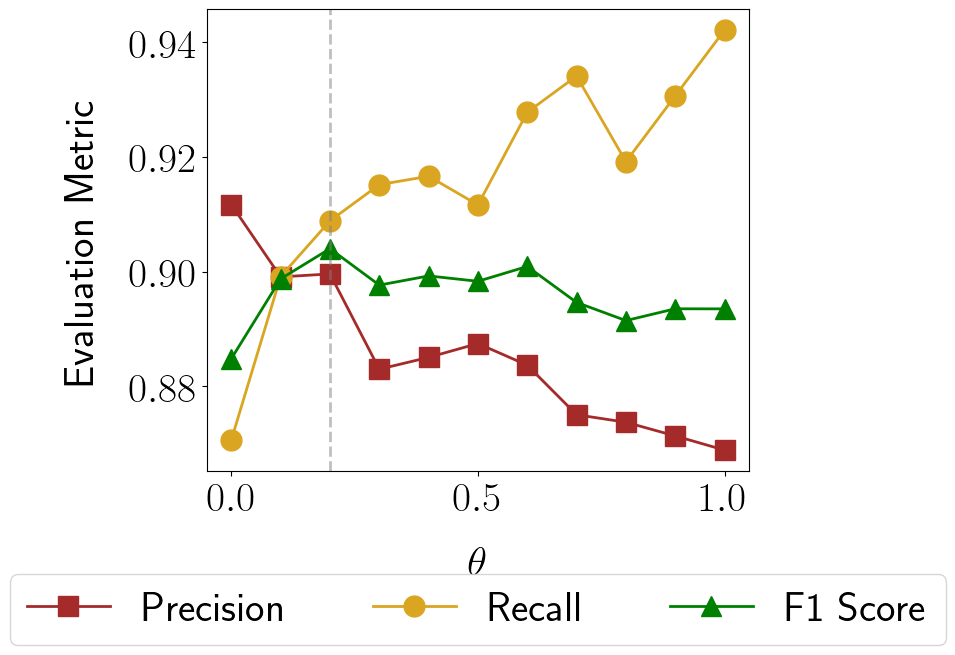

In [10]:
# you need to run 'scrpts/no_split.sh' for produce the hyperparameter finetuning plots.

thetas = 0.1*np.arange(11)
colors = ['brown', 'goldenrod', 'green']

precisions = np.zeros(len(thetas))
recalls = np.zeros(len(thetas))
f1scores = np.zeros(len(thetas))

for i, theta in enumerate(thetas):
    dir = get_results_path('no_split', 5, 64, 5, np.round(theta,1))
    precisions[i] = multi_label_predictions(dir, label_encoder, split='val', plot_confusion=False, return_precision=True)
    recalls[i] = multi_label_predictions(dir, label_encoder, split='val', plot_confusion=False, return_recall=True)
    f1scores[i] = multi_label_predictions(dir, label_encoder, split='val', plot_confusion=False, return_f1=True)

plt.figure(figsize=(7,6))
plt.plot(thetas, precisions, color=colors[0], label='Precision', markersize=15, linewidth=2, marker='s',)
plt.plot(thetas, recalls, color=colors[1], label='Recall', markersize=15, linewidth=2, marker='o',)
plt.plot(thetas, f1scores, color=colors[2], label='F1 Score', markersize=15, linewidth=2, marker='^',)
plt.axvline(0.2, color='grey', alpha=0.5, linestyle='--')
plt.xlabel(r'$\theta$', labelpad=20)
plt.ylabel('Evaluation Metric', labelpad=20)
plt.legend(loc='center', bbox_to_anchor=(.5, -0.3), ncol=3)
plt.show()

<Figure size 640x480 with 0 Axes>

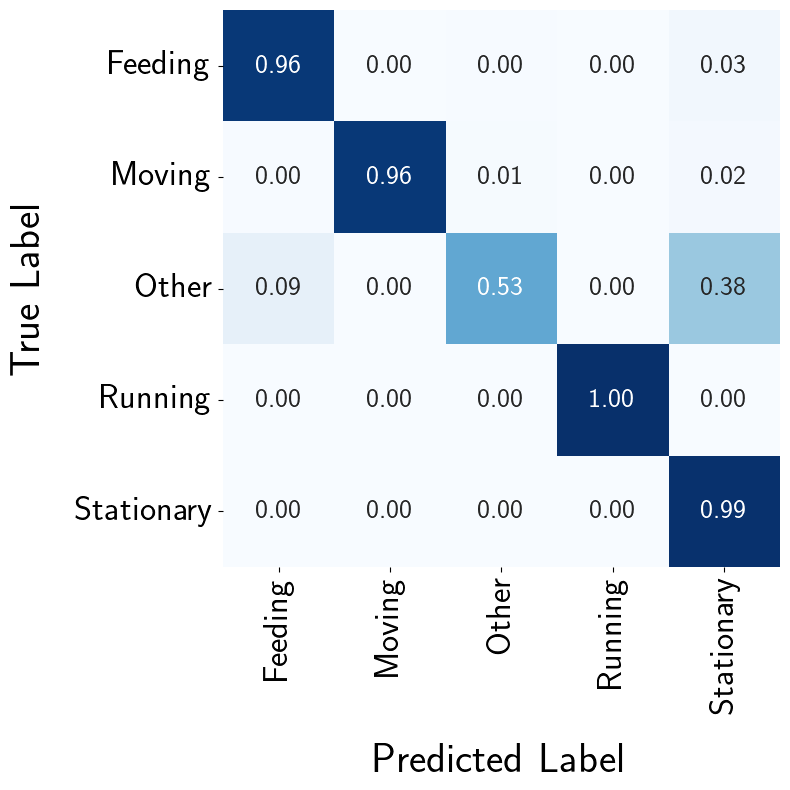

In [11]:
dir = get_results_path('no_split', 5, 64, 5, 0.0)
multi_label_predictions(dir, label_encoder, split='test', plot_confusion=True, return_accuracy=False)

<Figure size 640x480 with 0 Axes>

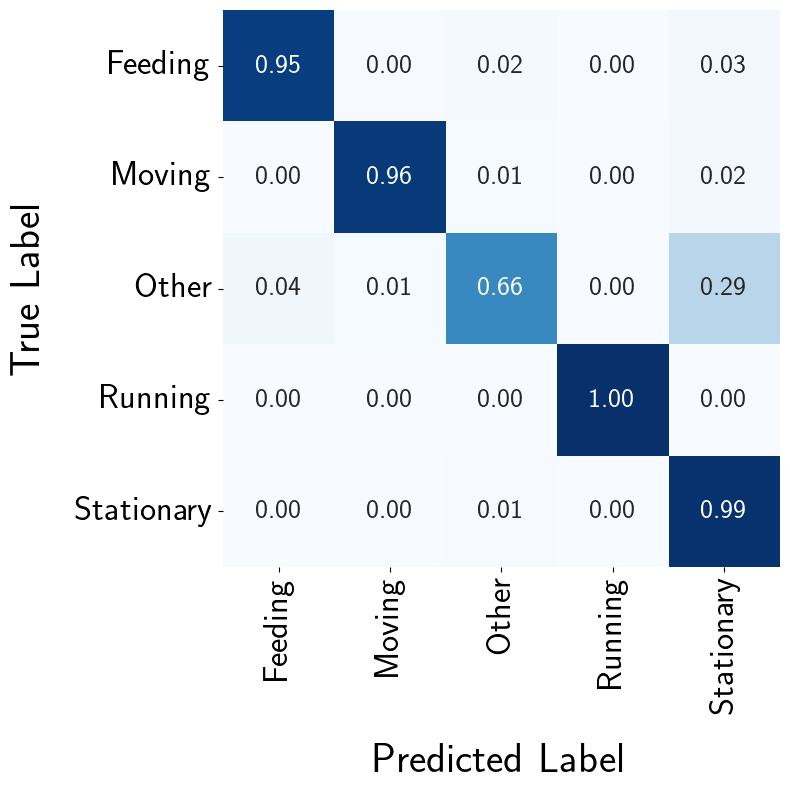

In [12]:
dir = get_results_path('no_split', 5, 64, 5, 0.2)
multi_label_predictions(dir, label_encoder, split='test', plot_confusion=True, return_accuracy=False)